## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# import and read the files
mouse_data = "data/Mouse_metadata.csv"
mouse_data = pd.read_csv(mouse_data)

study_results = "data/Study_results.csv"
study_results = pd.read_csv(study_results)

In [25]:
# Combine the data into a single dataset and preview
comb_df = pd.merge(mouse_data, study_results, how="inner", on="Mouse ID")
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
n_mouse = comb_df["Mouse ID"].count()
n_mouse

1893

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
same_mouse = comb_df[comb_df.duplicated(["Mouse ID","Timepoint"])]
same_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupl = comb_df[comb_df.duplicated(["Mouse ID"])].sort_values("Mouse ID")
all_dupl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
458,a203,Infubinol,Female,20,23,20,55.173336,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cl_df = comb_df.loc[comb_df["Mouse ID"] != 'g989']
cl_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [138]:
# Checking the number of mice in the clean DataFrame.
len(cl_df["Mouse ID"].unique())


248

## Summary Statistics

In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = comb_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = comb_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = comb_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = comb_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = comb_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Std_Dev" : std_dev, "SEM" : sem}).round(6)
sum_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
comb_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std','sem']}).round(6)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, '# of Mice per Tretatment')

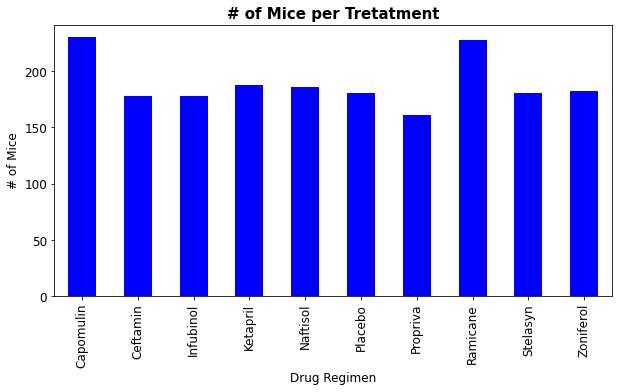

In [141]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
n_mice_trt = comb_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
#n_mice_trt

plot_pandas = n_mice_trt.plot.bar(figsize=(10,5), color = 'b',fontsize = 12)
n_mice_trt
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("# of Mice", fontsize = 12)
plt.title("# of Mice per Tretatment", fontsize = 15, fontweight='bold') 


Text(0, 0.5, 'Number of Mice')

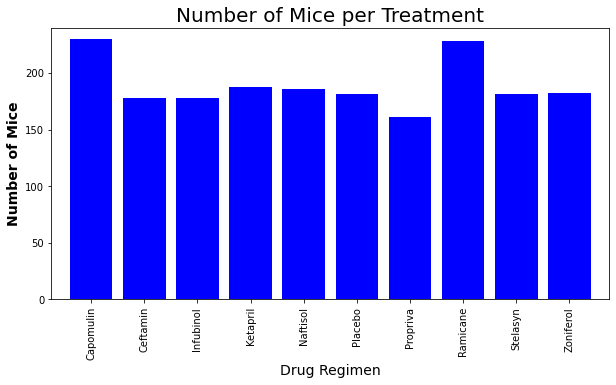

In [142]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Determine the number of mice in each drug test
n_mice_list =(comb_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
n_mice_list

# X axis info
x_axis = np.arange(len(n_mice_trt))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, n_mice_list, color='b', align='center')

# Adjust the labels
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Adjust bar chart size
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(n_mice_list)+10)

# Label axes and chart
plt.title("Number of Mice per Treatment", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14, fontweight = 'bold')

Text(0, 0.5, '')

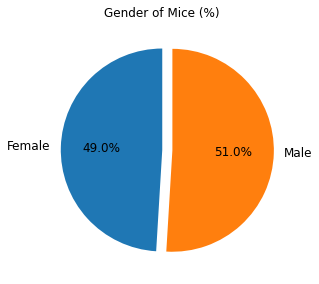

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
gender_df = cl_df.groupby(["Sex"]).count()
gender_df

gender_mice_df = gender_df[["Mouse ID"]]
gender_mice_df

# Create a pie chart
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect="equal")
explode = (0,0.1)
gender_mice_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=90, legend = False, fontsize=12, explode = explode)

plt.title("Gender of Mice (%)")
plt.xlabel("")
plt.ylabel("")


In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a list of values
n_gdr_count =(cl_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
n_gdr_count

[922, 958]

Text(0.5, 1.0, 'Gender of Mice (%)')

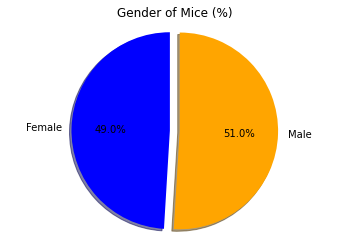

In [145]:

labels = ["Female" , "Male"]
colors = ["blue" , "orange"]
explode = (0.1, 0)

plt.pie(n_gdr_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Gender of Mice (%)")

## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ("Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin")
f_tumor_vol = cl_df.loc[cl_df["Drug Regimen"].isin(drug_list)]
#f_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
great_time_df = f_tumor_vol.groupby(f_tumor_vol["Mouse ID"]).agg({"Timepoint" : ['max']})
great_time_df.columns = ["Timepoint"]
#great_time_df.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_comb_df = pd.merge(great_time_df, cl_df, how = "left", on = ["Mouse ID", "Timepoint"])
tumor_vol_comb_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [156]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_comb_df["Tumor Volume (mm3)"].loc[tumor_vol_comb_df["Drug Regimen"] == drug]  
    
    # append subset 
    tumor_vols.append(tumor_vol_by_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(6)
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    low_b = (lowerq - (1.5*iqr)).round(6)
    upp_b = (upperq + (1.5*iqr)).round(6)
    print(f'For {drug}, outliers lie below {low_b}')
    print(f'For {drug}, outliers lie above {upp_b}\n')
    

For Capomulin, Interquartile Range (IQR) is 7.781863
For Capomulin, outliers lie below 20.704562
For Capomulin, outliers lie above 51.832015

For Ramicane, Interquartile Range (IQR) is 9.098537
For Ramicane, outliers lie below 17.912664
For Ramicane, outliers lie above 54.306812

For Infubinol, Interquartile Range (IQR) is 11.477135
For Infubinol, outliers lie below 36.832905
For Infubinol, outliers lie above 82.741445

For Ceftamin, Interquartile Range (IQR) is 15.577752
For Ceftamin, outliers lie below 25.35545
For Ceftamin, outliers lie above 87.666458



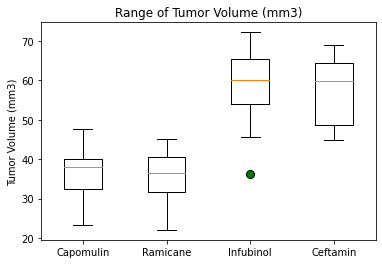

In [165]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Outline box plot paramaters
outlier = dict(marker='o', markerfacecolor='green', markersize= 8,
                  linestyle='none')

fig, ax = plt.subplots()
ax.set_title("Range of Tumor Volume (mm3)")
ax.set_xticklabels(drug_list)
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumor_vols, flierprops=outlier)
plt.show()

## Line and Scatter Plots

In [188]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cl_df.loc[cl_df["Drug Regimen"] == "Capomulin",:]
ran_cap = capomulin_df.sample(1)
#an_cap
m_id = ran_cap[ran_cap.columns[0]]
m_id

359    g316
Name: Mouse ID, dtype: object

In [192]:
# Plot the random capomulin data
m_id_treat = cl_df[['Timepoint', 'Tumor Volume (mm3)']].loc[(cl_df['Mouse ID'] = m_id.loc[0])]
m_id_treat

,Timepoint,Tumor Volume (mm3)
351,0,45.000000
352,5,44.022752
353,10,44.502042
354,15,45.216743
355,20,45.933322
356,25,46.809225
357,30,44.221480
358,35,44.702833
359,40,45.565821
360,45,40.159220


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
